In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(city,ride,on = 'city')

# Display the data table for preview
city_ride.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

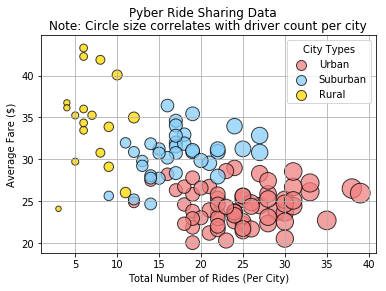

In [7]:
# Obtain the x and y coordinates for each of the three city types
#Obtaining x and y coordinates for Urban
city_ride_urban = city_ride[city_ride.type != "Rural"]
city_ride_urban = city_ride_urban[city_ride_urban.type != "Suburban"] 
city_ride_urban_df = pd.DataFrame(city_ride_urban.groupby(by = "city")["driver_count"].count())
city_ride_urban_fare_df = pd.DataFrame(city_ride_urban.groupby(by = "city")["fare"].sum())
city_ride_urban_merge = pd.merge(city_ride_urban_df,city_ride_urban_fare_df,on = "city")
city_ride_urban_merge["average"] = city_ride_urban_merge["fare"]/city_ride_urban_merge["driver_count"]
x_label = list(city_ride_urban_merge["driver_count"])
y_label = list(city_ride_urban_merge["average"])
#Plotting Urban
fig = plt.figure()
ax1 = fig.add_subplot(111)
area = city_ride_urban_merge["driver_count"]
ax1.scatter(x_label, y_label,s= area*10, c="lightcoral", edgecolor = "black", alpha=0.75, label = "Urban")
colors = ["lightcoral"]
#---------------------------------------------
#Obtaining x and y coordinates for Suburban
city_ride_Suburban = city_ride[city_ride.type != "Urban"] 
city_ride_Suburban =city_ride_Suburban[city_ride_Suburban.type != "Rural"]
city_ride_Suburban_df = pd.DataFrame(city_ride_Suburban.groupby(by = "city")["driver_count"].count())
city_ride_Suburban_fare_df = pd.DataFrame(city_ride_Suburban.groupby(by = "city")["fare"].sum())
city_ride_Suburban_merge = pd.merge(city_ride_Suburban_df,city_ride_Suburban_fare_df,on = "city")
city_ride_Suburban_merge["average"] = city_ride_Suburban_merge["fare"]/city_ride_Suburban_merge["driver_count"]
x_Sublabel = list(city_ride_Suburban_merge["driver_count"]) 
y_Sublabel = list(city_ride_Suburban_merge["average"])
#Plotting Suburban
area = city_ride_Suburban_merge["driver_count"] 
colors = ["lightskyblue"]
ax1.scatter(x_Sublabel, y_Sublabel,s= area*10, c="lightskyblue",edgecolor = "black", alpha=0.75,label = "Suburban")
#---------------------------------------------
#Obtaining x and y coordinates for Rural
city_ride_Rural = city_ride[city_ride.type != "Urban"] 
city_ride_Rural =city_ride_Rural[city_ride_Rural.type != "Suburban"]
city_ride_Rural_df = pd.DataFrame(city_ride_Rural.groupby(by = "city")["driver_count"].count())
city_ride_Rural_fare_df = pd.DataFrame(city_ride_Rural.groupby(by = "city")["fare"].sum())
city_ride_Rural_merge = pd.merge(city_ride_Rural_df,city_ride_Rural_fare_df,on = "city")
city_ride_Rural_merge["average"] = city_ride_Rural_merge["fare"]/city_ride_Rural_merge["driver_count"]
x_Sublabel = list(city_ride_Rural_merge["driver_count"]) 
y_Sublabel = list(city_ride_Rural_merge["average"])
#Plotting Rural
area = city_ride_Rural_merge["driver_count"] 
ax1.scatter(x_Sublabel, y_Sublabel,s= area*10, c="Gold",edgecolor = "black", alpha=0.75, label="Rural")
#Labeling and Graph details
lgd = plt.legend(loc='upper right',title = "City Types")
lgd.legendHandles[0]._sizes = [100]
lgd.legendHandles[1]._sizes = [100]
lgd.legendHandles[2]._sizes = [100]
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.suptitle('Pyber Ride Sharing Data')
plt.title("Note: Circle size correlates with driver count per city")
plt.grid(True)
plt.show()

## Total Fares by City Type

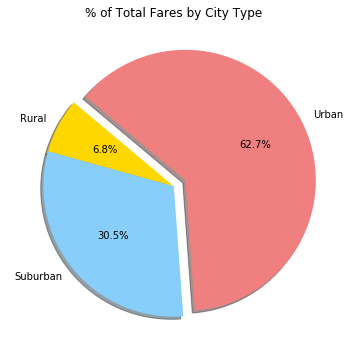

In [11]:
# Calculate Type Percents
group_city_ride = city_ride.groupby("type")
group_city_ride_df = pd.DataFrame(city_ride.groupby(by = "type")["fare"].sum())

Rural = group_city_ride_df.iloc[0,0]
Suburban = group_city_ride_df.iloc[1,0]
Urban = group_city_ride_df.iloc[2,0]

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
counts = [Rural,Suburban,Urban]
colors = ["Gold", "lightskyblue","lightcoral"]

# Save Figure
explode = (0, 0, 0.1)
plt.pie(counts, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
fig = plt.gcf()
fig.set_size_inches(6,6)

plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

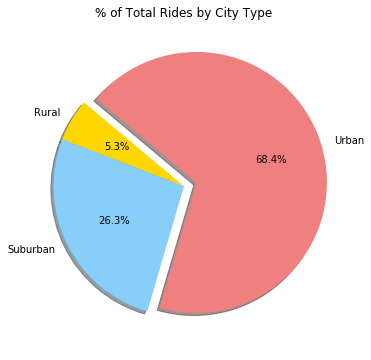

In [9]:

# Calculate Ride Percents
group = city_ride.groupby("type").count()
group = group.head()
type_rural = group.loc["Rural","city"]
type_Suburban = group.loc["Suburban","city"]
type_urban = group.loc["Urban","city"]

#Build Pie Chart
labels = ["Rural","Suburban","Urban"]
counts = [type_rural,type_Suburban,type_urban]
colors = ["Gold", "lightskyblue","lightcoral"]

# Save Figure
explode = (0, 0, 0.1)
plt.pie(counts, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

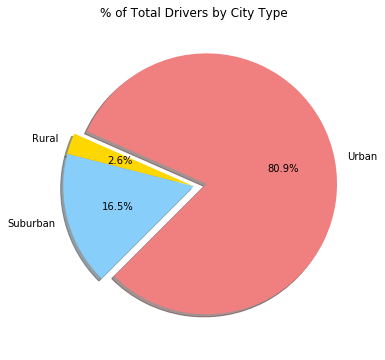

In [10]:
# Calculate Driver Percents
new_city_ride = city_ride.drop(columns = ["fare","ride_id","date"])
new_city_ride_drop = new_city_ride.drop_duplicates(subset='city', keep="last")
new_city_ride_drop_sum = new_city_ride_drop["driver_count"].sum()

#reduce dataframe to only have type = Urban
new_city_ride_drop_rural = new_city_ride_drop[new_city_ride_drop.type != "Rural"]
new_city_ride_drop_Suburban = new_city_ride_drop_rural[new_city_ride_drop_rural.type != "Suburban"]
new_city_ride_Urban_sum = new_city_ride_drop_Suburban["driver_count"].sum()

#reduce dataframe to only have type = Suburban
new_city_ride_drop_Urban = new_city_ride_drop_rural[new_city_ride_drop_rural.type != "Urban"]
new_city_ride_Suburban_sum = new_city_ride_drop_Urban["driver_count"].sum()

#reduce dataframe to only have type = Rural
new_city_ride_drop_Suburban = new_city_ride_drop[new_city_ride_drop.type != "Suburban"]
new_city_ride_drop_Urban = new_city_ride_drop_Suburban[new_city_ride_drop_Suburban.type != "Urban"]
new_city_ride_Rural_sum = new_city_ride_drop_Urban["driver_count"].sum()


# Build Pie Charts
counts = [new_city_ride_Urban_sum,new_city_ride_Rural_sum,new_city_ride_Suburban_sum]
labels= ["Urban","Rural","Suburban"]
colors = ["lightcoral","Gold", "lightskyblue"]

# # Save Figure
explode = (0.1, 0, 0)
plt.pie(counts, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=225)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title("% of Total Drivers by City Type")
plt.show()

## written description of three observable trends based on the data

1) One observation that stands out is that Urban cities hold the highest percentage of Total Drivers, Total Rides, and Total Fares

2) Another observation from the data set is that there is a higher rate in the fare for Rural cities compare to the low fare rate in the Urban cities. This is clearly shown in the Bubble Plot

3) A last observation is Suburban cities have a lower number of drivers in their cities but have a higher percentage of fare rates. 